📏 Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

🏢 Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


/tmp/ipykernel_358147/3272086622.py:40: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/media/developer/Hailat1/Projects/AI Mastery/news-sentiment-price-movement/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


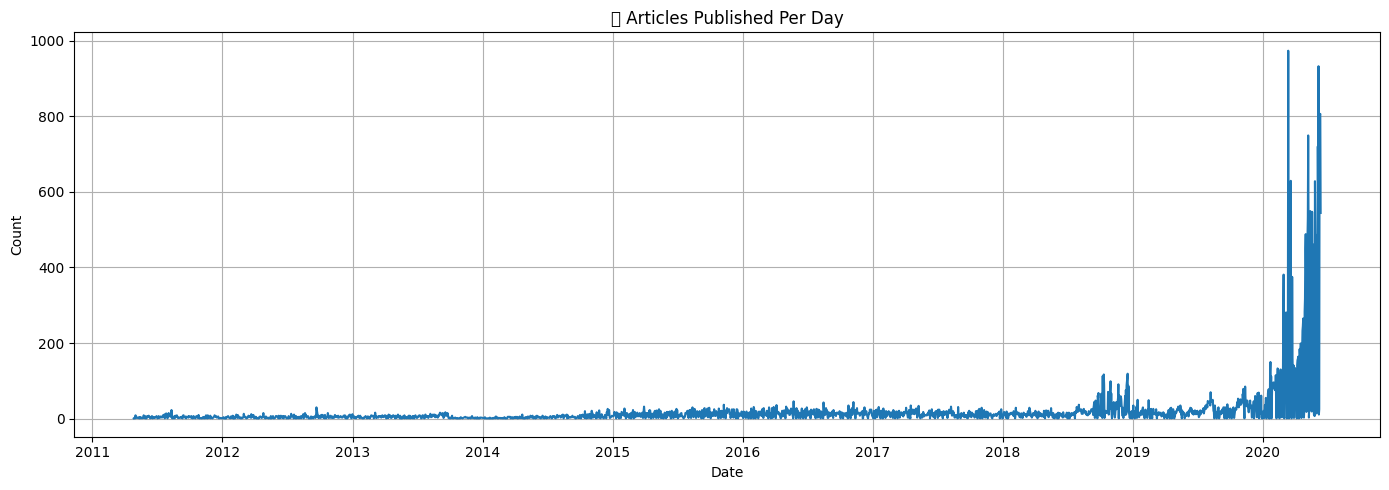

In [ ]:
# 📦 Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 📁 Load the Dataset
df = pd.read_csv("./data/raw_analyst_ratings.csv")

# 🧹 Preprocess 'date' column
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# ➕ Feature Engineering
df['headline_length'] = df['headline'].apply(len)
df['publish_date'] = df['date'].dt.date
df['publish_hour'] = df['date'].dt.hour

# -------------------------------------------
# 📊 1. DESCRIPTIVE STATISTICS
# -------------------------------------------

# 1.1 Headline Length Statistics
print("📏 Headline Length Stats:")
print(df['headline_length'].describe())

# 1.2 Articles Per Publisher
print("\n🏢 Top Publishers:")
top_publishers = df['publisher'].value_counts().head(10)
print(top_publishers)

# 1.3 Articles Per Day
daily_counts = df.groupby('publish_date').size()
plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title("🗓 Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# 🧠 2. TOPIC MODELING (LDA)
# -------------------------------------------

# Drop NaNs for topic modeling
df_nlp = df.dropna(subset=['headline'])

vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df_nlp['headline'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

print("\n🧾 Top 10 Words per Topic:")
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# -------------------------------------------
# ⏰ 3. TIME SERIES ANALYSIS
# -------------------------------------------

# 3.1 Publishing Hour Distribution
plt.figure(figsize=(10, 5))
df['publish_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("⏰ Publishing Hour Distribution")
plt.xlabel("Hour of Day (UTC-4)")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# 📰 4. PUBLISHER ANALYSIS
# -------------------------------------------

# 4.1 Publisher Bar Chart
plt.figure(figsize=(8, 5))
top_publishers.sort_values().plot(kind='barh', color='lightgreen')
plt.title("🏢 Top 10 Publishers")
plt.xlabel("Article Count")
plt.tight_layout()
plt.show()

# 4.2 Publisher Domain Analysis (if email format is used)
df['publisher_domain'] = df['publisher'].str.extract(r'@(\S+)')
top_domains = df['publisher_domain'].value_counts().head(10)
print("\n📨 Top Publisher Email Domains:")
print(top_domains)
